### Import Libraries ###

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

### Reading Data by using pandas

In [4]:
df=pd.read_csv("/kaggle/input/titanic-dataset1/Titanic-Dataset.csv")


### Reading first 5 rows¶

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking null values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Replacing null values of age by its mean 

In [9]:
df["Age"]=df["Age"].replace(np.nan,df["Age"].mean())

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Replacing Null values of embarked column by using forward fill method

In [13]:
df['Embarked'].fillna(method='ffill',inplace=True)

### Remove Missing Values from DataFrame 

In [14]:
df.dropna(inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#  Exploring the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Number of females and males in titanic

In [150]:
sex_counts = df['Sex'].value_counts()
sex_counts 

Sex
male      577
female    314
Name: count, dtype: int64

### pie plot for Gender Distribution Among Titanic Passengers

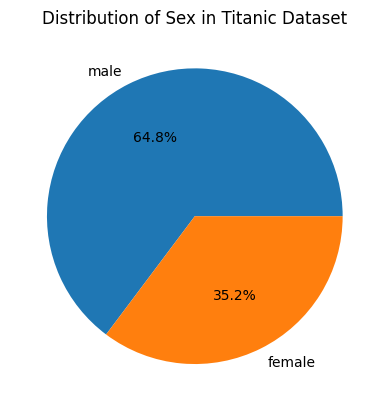

In [151]:
plt.pie(sex_counts,labels=sex_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Sex in Titanic Dataset')
plt.show()

### Passenger Class Distribution by Sex

In [152]:
pd.crosstab(df["Sex"],df["Pclass"])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


### Bar Plot For Passenger Class Distribution by Sex

<Axes: xlabel='Sex'>

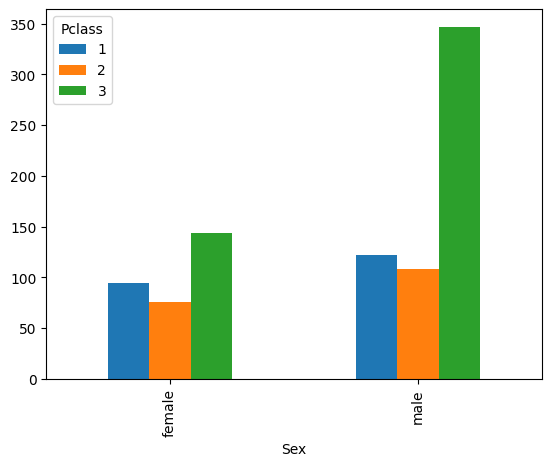

In [153]:
pd.crosstab(df["Sex"],df["Pclass"]).plot(kind="bar")

### Survival Rates by Sex

In [154]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


### Bar Plot For Survival Rates by Sex

<Axes: xlabel='Sex'>

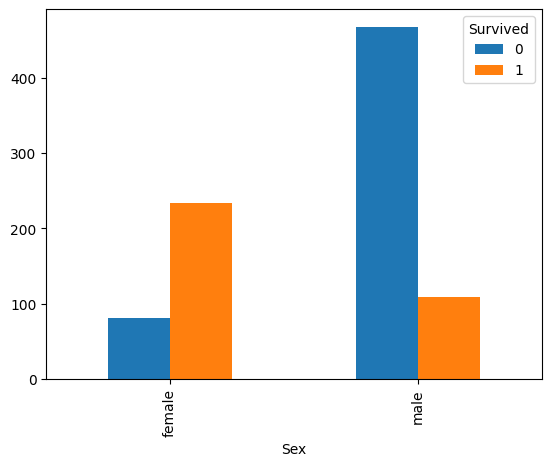

In [155]:
pd.crosstab(df["Sex"],df["Survived"]).plot(kind="bar")

### Survival Rates by Passenger Class

In [156]:
pd.crosstab(df["Pclass"],df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### Bar Plot For Survival Rates by Passenger Class

<Axes: xlabel='Pclass'>

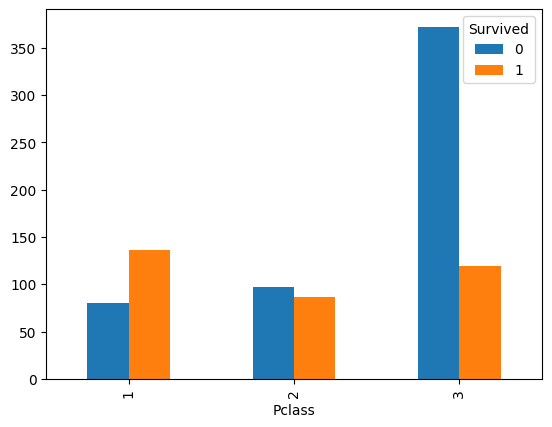

In [157]:
pd.crosstab(df["Pclass"],df["Survived"]).plot(kind="bar")

### Comparison of Fare by Passenger Class and Embarkation Point

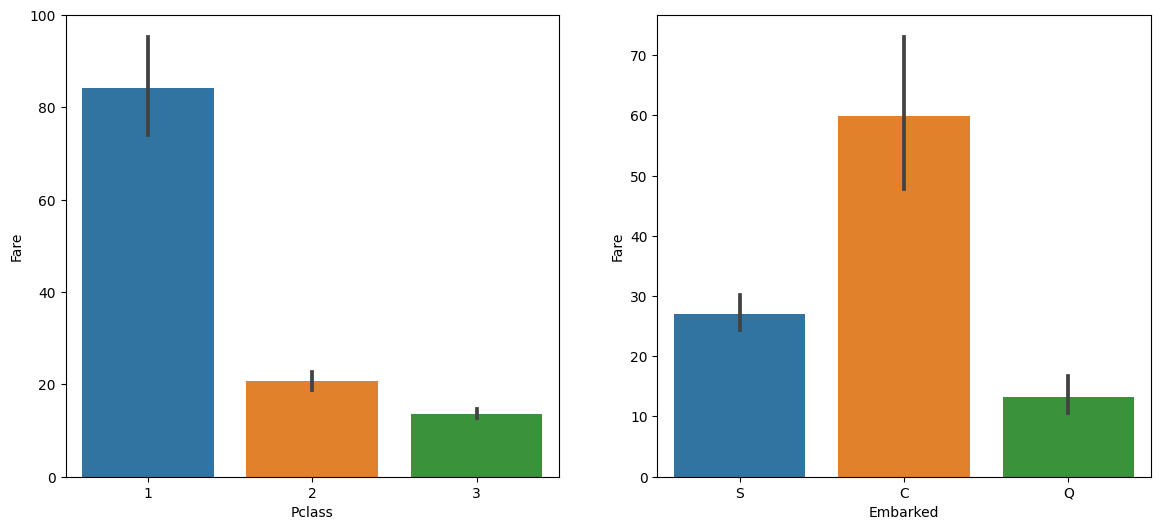

In [158]:
f,ax = plt.subplots(1,2,figsize=(14,6))
sns.barplot(x="Pclass",y="Fare",data=df,ax=ax[0])

sns.barplot(x='Embarked',y='Fare',data=df,ax=ax[1])
plt.show()

### Drop Unneeded Columns 

In [159]:
df.drop(["Name","Ticket","Embarked","Cabin","PassengerId"],axis="columns",inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


### Encode For Sex Column

In [160]:
df['Sex'].replace("male",1,inplace=True)
df['Sex'].replace("female",0,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


### Mean Survival Rates by Sex and Survival Status 

In [161]:
df.groupby(['Sex','Survived']).mean()

Pclass        Age     SibSp     Parch       Fare
Sex Survived                                                    
0   0         2.851852  25.046875  1.209877  1.037037  23.024385
    1         1.918455  28.847716  0.515021  0.515021  51.938573
1   0         2.476496  31.618056  0.440171  0.207265  21.960993
    1         2.018349  27.276022  0.385321  0.357798  40.821484

### Number of Survived & Unsurvived in Titanic 

In [162]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Pie Plot for Distribution of Survival Outcomes in the Dataset

([<matplotlib.patches.Wedge at 0x7a905e2c9cf0>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38%')])

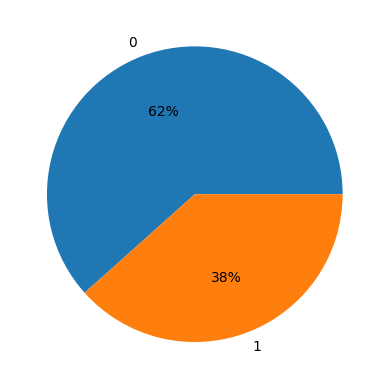

In [163]:
plt.pie(df['Survived'].value_counts(),labels=df['Survived'].value_counts().index,autopct="%0.0f%%")

In [164]:
df.nunique()


Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
dtype: int64

### Group DataFrame by 'Pclass' and 'Survived' and Count Values 

In [166]:
df.groupby(['Pclass','Survived']).value_counts()

Pclass  Survived  Sex  Age   SibSp  Parch  Fare    
1       0         1    62.0  0      0      26.5500     2
                  0    2.0   1      2      151.5500    1
                       25.0  1      2      151.5500    1
                       50.0  0      0      28.7125     1
                  1    18.0  1      0      108.9000    1
                                                      ..
3       1         1    32.0  0      0      7.9250      1
                                           8.0500      1
                       39.0  0      0      7.9250      1
                       44.0  0      0      7.9250      1
                       45.0  0      0      8.0500      1
Name: count, Length: 674, dtype: int64

### "Group DataFrame by 'Sex' and 'Survived' and Count Values 

In [167]:
df.groupby(['Sex','Survived']).value_counts()

Sex  Survived  Pclass  Age   SibSp  Parch  Fare    
0    0         1       2.0   1      2      151.5500    1
                       25.0  1      2      151.5500    1
                       50.0  0      0      28.7125     1
               2       24.0  0      0      13.0000     1
                       26.0  1      1      26.0000     1
                                                      ..
1    1         3       32.0  0      0      7.9250      1
                                           8.0500      1
                       39.0  0      0      7.9250      1
                       44.0  0      0      7.9250      1
                       45.0  0      0      8.0500      1
Name: count, Length: 674, dtype: int64

### Calculate Mean Values Grouped by 'Age' and 'Survived

In [168]:
df.groupby(['Age','Survived']).mean()

,,Pclass,Sex,SibSp,Parch,Fare
Age,Survived,,,,,
0.42,1,3.0,1.0,0.0,1.0,8.5167
0.67,1,2.0,1.0,1.0,1.0,14.5000
0.75,1,3.0,0.0,2.0,1.0,19.2583
0.83,1,2.0,1.0,0.5,1.5,23.8750
0.92,1,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...,...
70.00,0,1.5,1.0,0.5,0.5,40.7500
70.50,0,3.0,1.0,0.0,0.0,7.7500
71.00,0,1.0,1.0,0.0,0.0,42.0792


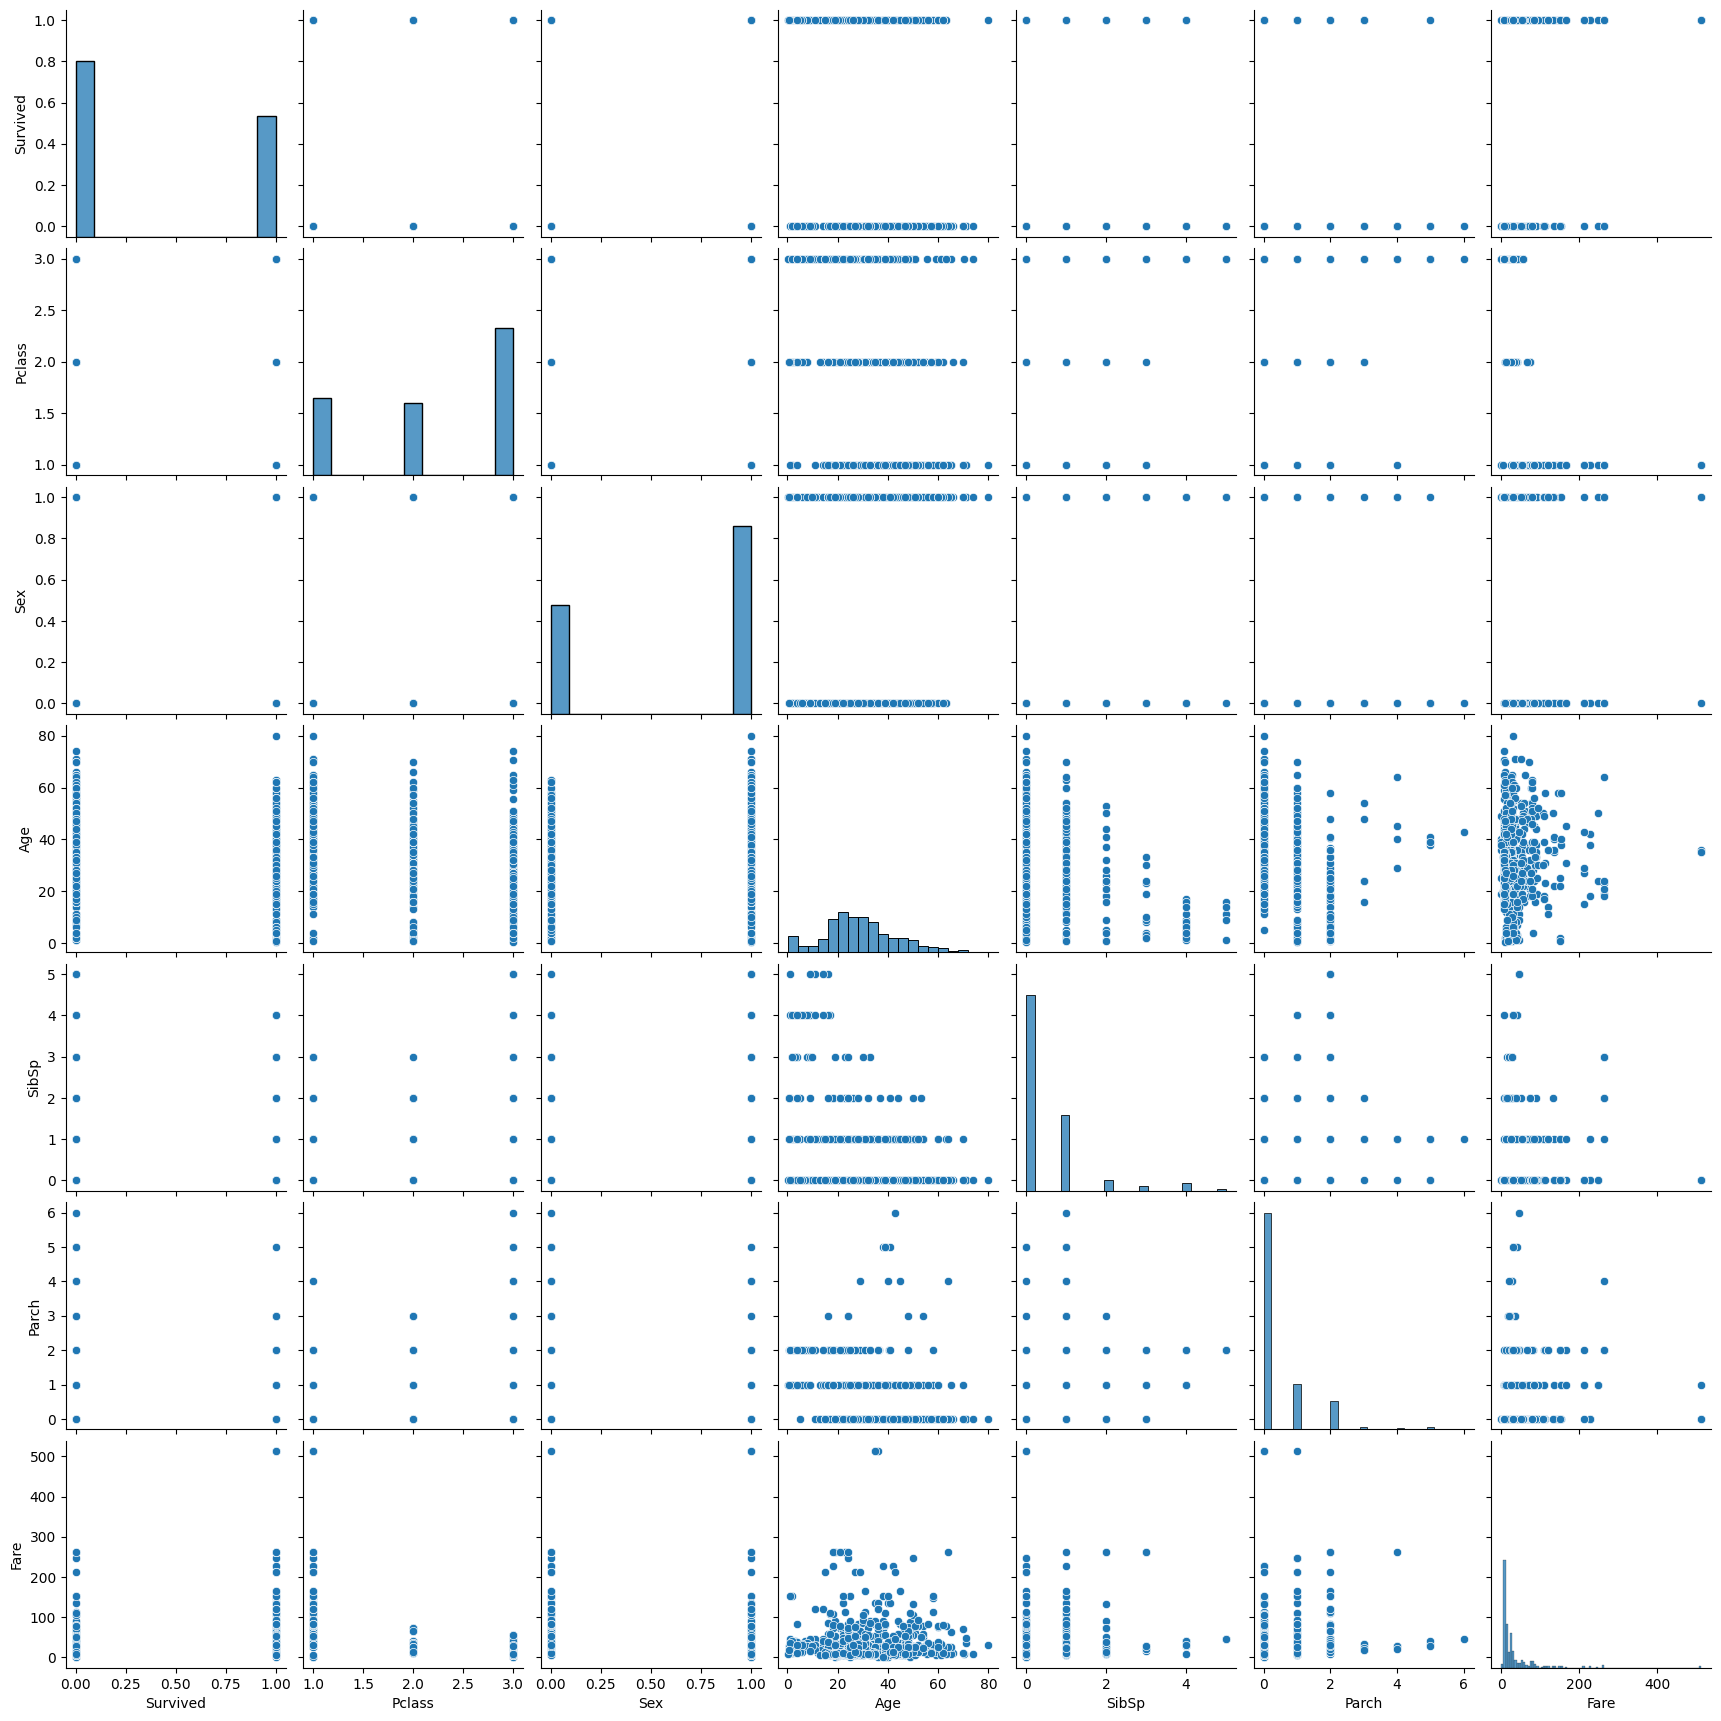

In [169]:
sns.pairplot(df)

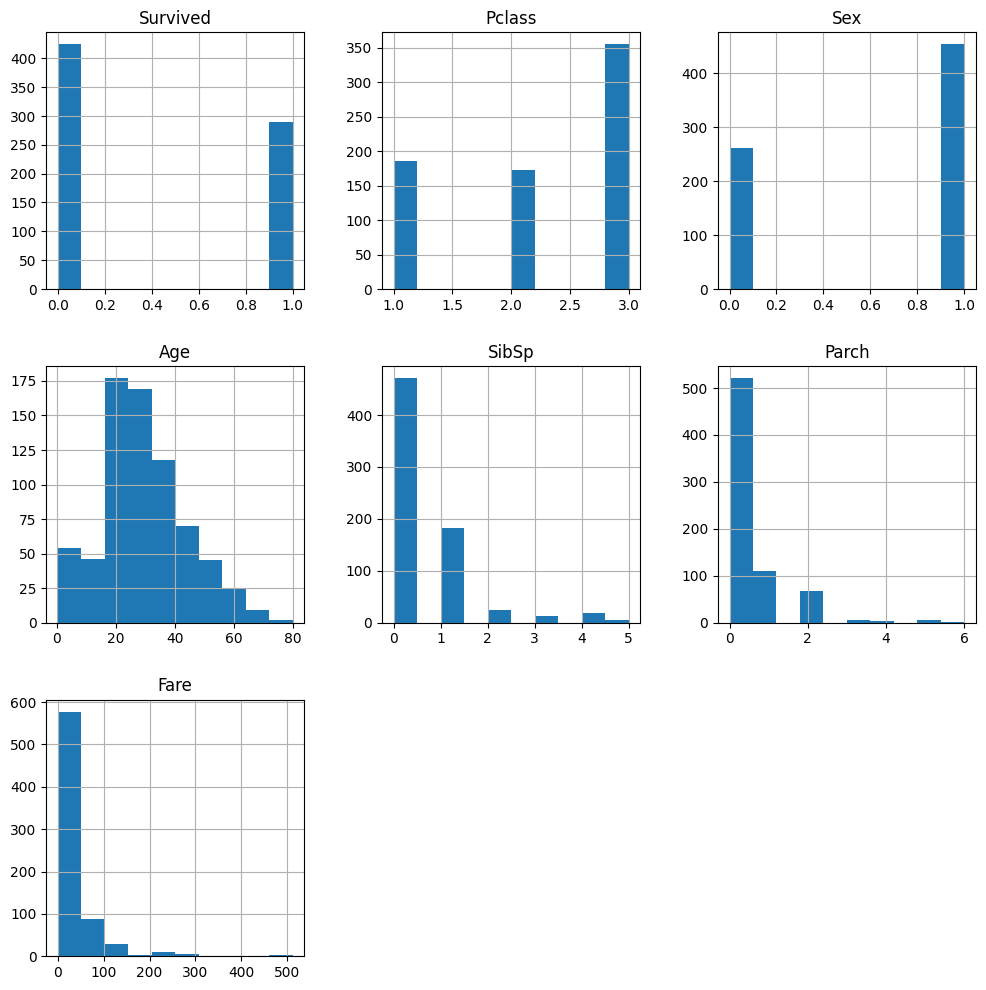

In [171]:
df.hist(figsize=(12,12))
plt.show()

### Compute Correlation Matrix for DataFrame 

In [172]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,-0.538826,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,0.155460,-0.369226,0.067247,0.025683,-0.554182
Sex,-0.538826,0.155460,1.000000,0.093254,-0.103950,-0.246972,-0.184994
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,-0.103950,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,-0.246972,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,-0.184994,0.096067,0.138329,0.205119,1.000000


### Initialize Label Encoders for 'Sex', 'Pclass', 'Fare', and 'Age' Columns

In [135]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
le_pclass=LabelEncoder()
le_fare=LabelEncoder()
le_age=LabelEncoder()

In [136]:
df['Sex']=le_sex.fit_transform(df['Sex'])
df['Pclass']=le_pclass.fit_transform(df['Pclass'])
df['Age']=le_age.fit_transform(df['Age'])
df['Fare']=le_fare.fit_transform(df['Fare'])

In [137]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,1,28,1,0,16
1,1,0,0,51,1,0,180
2,1,2,0,34,0,0,32
3,1,0,0,47,1,0,163
4,0,2,1,47,0,0,34
...,...,...,...,...,...,...,...
885,0,2,0,52,0,5,128
886,0,1,1,35,0,0,72
887,1,0,0,24,0,0,130
889,1,0,1,34,0,0,130


In [138]:
x=df.drop("Survived",axis="columns")
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,2,1,28,1,0,16
1,0,0,51,1,0,180
2,2,0,34,0,0,32
3,0,0,47,1,0,163
4,2,1,47,0,0,34
...,...,...,...,...,...,...
885,2,0,52,0,5,128
886,1,1,35,0,0,72
887,0,0,24,0,0,130
889,0,1,34,0,0,130


In [139]:
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

 # Model Training and Prediction

In [140]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

### Model Training

In [141]:
model.fit(x,y)

DecisionTreeClassifier()

In [142]:
model.score(x,y)

0.9859943977591037

### Model Prediction 

In [143]:
model.predict([[2,1,28,1,0,16]])

array([0])

In [144]:
model.feature_importances_

array([0.13239968, 0.29961182, 0.24576021, 0.06233667, 0.02174442,
       0.23814719])